In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1, '../src')
from utils.accuracy import *
from utils.dm_test import dm_test

In [3]:
y_hats_all = pd.read_csv("../assets/y_hats/y_hats_all_vsibes.csv", index_col=[0, 1, 2])
y_hats_all

y_test  y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  \
企業名    会計年度 四半期                                                         
いすゞ自動車 2018 Q1   48.380000     27.74        33.194516       39.930566   
            Q2   24.150000     48.38        28.366444       28.002100   
            Q3   50.860000     24.15        38.824756       39.095560   
            Q4   26.430000     50.86        36.040824       32.019464   
       2019 Q1   37.130000     26.43        43.788193       47.922773   
...                    ...       ...              ...             ...   
ＴＯＷＡ   2019 Q4   11.580000     11.21        20.687856       25.432088   
       2020 Q1    8.260000     11.58         6.524577      -20.795096   
            Q2   27.300000      8.26        22.013448       23.338850   
            Q3   35.290000     27.30        12.649111       18.455527   
            Q4   35.707105     35.29        29.574206       23.366923   

                 y_hat_sarima_g  y_hat_umlp  y_hat_men_a10  y_hat_men  \
企業名    会計年度 四半期                                                         
いすゞ自動車 2018 Q1        36.294894   25.910357      36.128675  42.417694   
            Q2        29.226981   26.813747      33.459928  20.154197   
            Q3        41.291053   40.185104      47.764854  59.143198   
            Q4        41.555242   22.757215      35.474413  29.587927   
       2019 Q1        47.508122   39.468372      44.373211  48.071410   
...                         ...         ...            ...        ...   
ＴＯＷＡ   2019 Q4         6.516588   35.449900      12.751577  11.985923   
       2020 Q1         1.010510    6.682460       6.094056   2.384820   
            Q2        16.411733   15.093909      16.545373   9.908313   
            Q3        10.216570   34.139015      32.517516  33.496303   
            Q4        32.204562   36.704296      33.732945  33.479281   

                 y_hat_men_i_tuned_simple  y_hat_ml1_a10  ...  y_hat_mlm2  \
企業名    会計年度 四半期                                           ...               
いすゞ自動車 2018 Q1                  34.972401      34.756859  ...   19.631389   
            Q2                  34.699016      34.935023  ...   27.054626   
            Q3                  45.447202      44.914890  ...   44.978070   
            Q4                  37.702613      38.268295  ...   30.287266   
       2019 Q1                  42.342994      41.573212  ...   38.967565   
...                                   ...            ...  ...         ...   
ＴＯＷＡ   2019 Q4                  10.507017      11.983396  ...   11.549762   
       2020 Q1                   5.823248       7.411550  ...   23.935557   
            Q2                  12.810770      18.772574  ...   17.206629   
            Q3                  32.612075      34.097347  ...   21.461350   
            Q4                  34.124883      36.642761  ...   39.860271   

                 y_hat_mlm3  y_hat_mlm4  y_hat_mmlp  y_hat_mraf  \
企業名    会計年度 四半期                                                   
いすゞ自動車 2018 Q1    20.499944  -48.088072   36.510580   33.855803   
            Q2    23.298118   10.090125   29.579592   30.480000   
            Q3    48.156591   -5.821929   27.467480   34.235600   
            Q4    27.642116   47.933502   39.467580   31.043200   
       2019 Q1    39.609879   22.774413   49.485010   37.613000   
...                     ...         ...         ...         ...   
ＴＯＷＡ   2019 Q4    23.069243    9.233298   26.150269   11.126000   
       2020 Q1    21.689540   37.421219   20.017757    4.455000   
            Q2    17.838851  -15.905929   17.632080   16.300700   
            Q3    22.530475   21.536398   27.898632   28.161700   
            Q4    44.013450   46.547376   36.403990   32.117000   

                 y_hat_mraf_i_tuned_simple_  y_hat_msvm  \
企業名    会計年度 四半期                                           
いすゞ自動車 2018 Q1                    33.855803   26.344896   
            Q2                    30.480000   27.368355   
          

In [4]:
def dm_table(y_hats, method1, method2, crit="MAPE"):
    firm_list = y_hats.index.get_level_values(0).unique()
    firm_list = list(firm_list)

    def dm_test_i(firm, crit=crit):
        firm_slice = y_hats.loc[pd.IndexSlice[firm, :, :], :]
        return dm_test(firm_slice["y_test"], firm_slice[method1], firm_slice[method2], h=1, crit=crit)

    dm_results = list(map(dm_test_i, firm_list))

    dm = pd.DataFrame(dm_results, index=firm_list)

    ac_i = pd.read_csv("../assets/y_hats/accuracy_table_i_vsibes.csv", index_col=[0, 1])
    crit_i = ac_i.loc[pd.IndexSlice[:, crit], [method1, method2]]
    crit_i.index = firm_list
    dm = pd.concat([dm, crit_i], axis=1)
    def sig_level(x):
        sig_level = None
        if x <= 0.01:
            sig_level = "0.01"
        elif (0.01 < x) & (x <= 0.05):
            sig_level = "0.05"
        elif (0.05 < x) & (x <= 0.10):
            sig_level = "0.10"
        else:
            sig_level = "not stat sig"
        return sig_level
    dm["sig_level"] = dm["p_value"].apply(sig_level)
    return dm

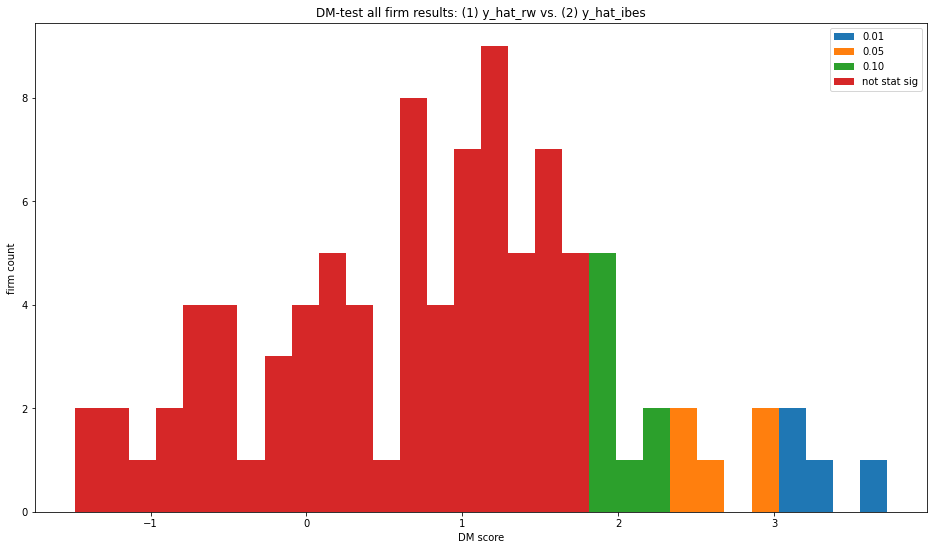

0 0 0 20 | 58 10 7 4


In [5]:
method_1 = "y_hat_rw"
method_2 = "y_hat_ibes"
dm_mape = dm_table(y_hats_all, method_1, method_2, crit="MAPE")

# pivot and plot
dm_mape.pivot(columns="sig_level", values="DM").plot.hist(bins=30, figsize=(16, 9))
plt.xlabel("DM score")
plt.ylabel("firm count")
plt.legend()
plt.title("DM-test all firm results: (1) " + method_1 + " vs. (2) " + method_2)
plt.show()

p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

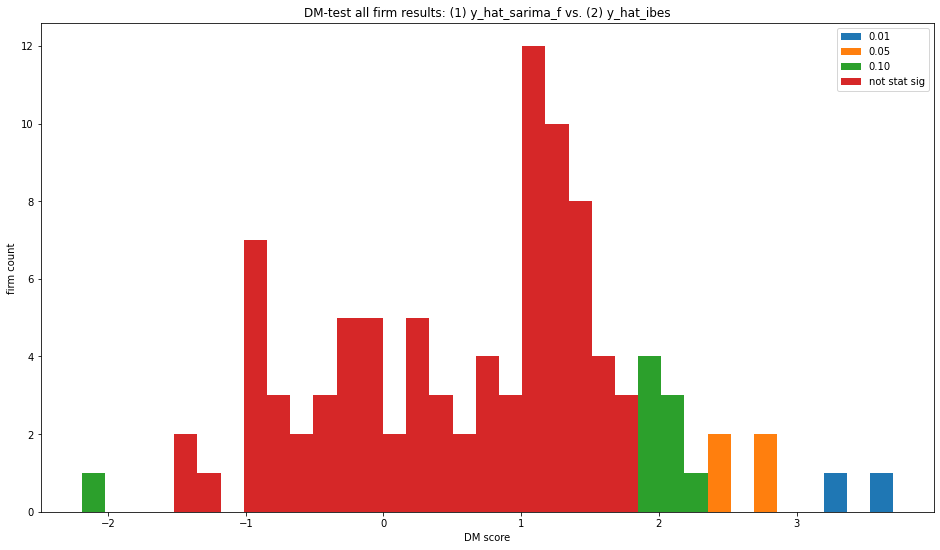

0 0 1 29 | 55 8 4 2


In [6]:
method_1 = "y_hat_sarima_f"
method_2 = "y_hat_ibes"
dm_mape = dm_table(y_hats_all, method_1, method_2, crit="MAPE")

# pivot and plot
dm_mape.pivot(columns="sig_level", values="DM").plot.hist(bins=35, figsize=(16, 9))
plt.xlabel("DM score")
plt.ylabel("firm count")
plt.legend()
plt.title("DM-test all firm results: (1) " + method_1 + " vs. (2) " + method_2)
plt.show()

p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

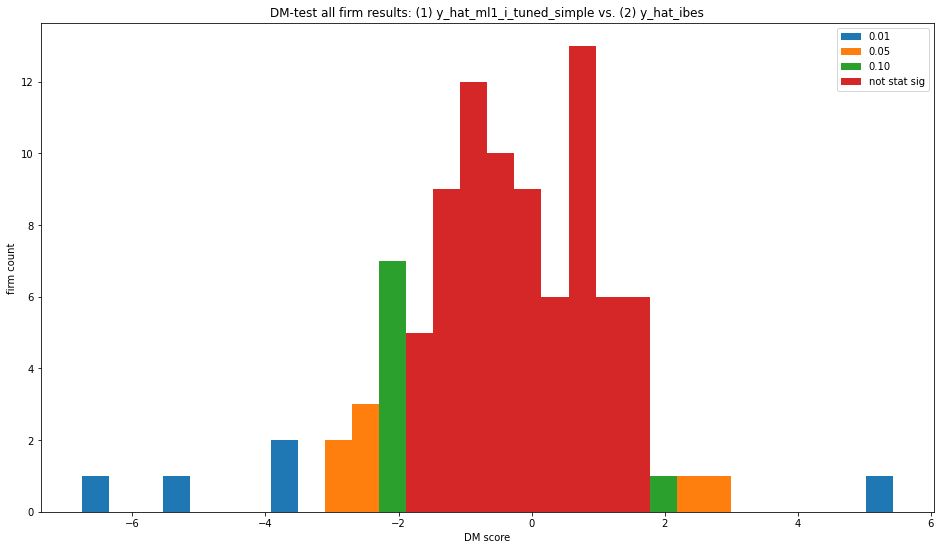

4 6 9 42 | 34 1 2 1


In [7]:
method_1 = "y_hat_ml1_i_tuned_simple"
method_2 = "y_hat_ibes"
dm_mape = dm_table(y_hats_all, method_1, method_2, crit="MAPE")

# pivot and plot
dm_mape.pivot(columns="sig_level", values="DM").plot.hist(bins=30, figsize=(16, 9))
plt.xlabel("DM score")
plt.ylabel("firm count")
plt.legend()
plt.title("DM-test all firm results: (1) " + method_1 + " vs. (2) " + method_2)
plt.show()

p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

検定的にはIBESよりもLassoが勝ってる企業が多い

いすゞ自動車


[]

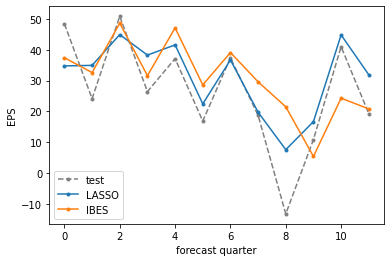

In [8]:
firm_list = y_hats_all.index.get_level_values(0).unique()

plot_firm = firm_list[0]
print(plot_firm)
plt.plot(y_hats_all.loc[plot_firm]["y_test"].values, marker=".", color="gray", linestyle="--", label="test")
plt.plot(y_hats_all.loc[plot_firm][method_1].values, marker=".", label="LASSO")
plt.plot(y_hats_all.loc[plot_firm][method_2].values, marker=".", label="IBES")
plt.xlabel("forecast quarter")
plt.ylabel("EPS")
plt.legend()
plt.plot()